In [135]:
# importing libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [136]:
# importing and reading dataset to obtain general idea/statistics that will be worked with
df = pd.read_csv("final_dataset.csv")
df.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


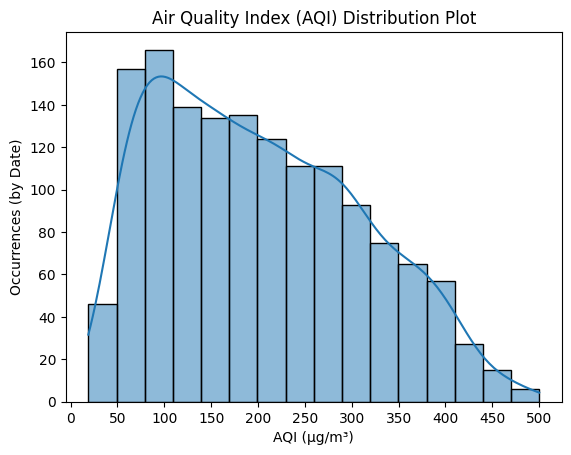

<Figure size 1400x1000 with 0 Axes>

In [137]:
# creating a data distribution of the AQI over 5 year span
plt.title('Air Quality Index (AQI) Distribution Plot')
sns.histplot(df['AQI'], kde=True)
plt.xlabel('AQI (µg/m³)')
plt.xticks(np.arange(0, df['AQI'].max() + 50, 50))
plt.ylabel('Occurrences (by Date)')
plt.figure(figsize=(14, 10))
plt.show()

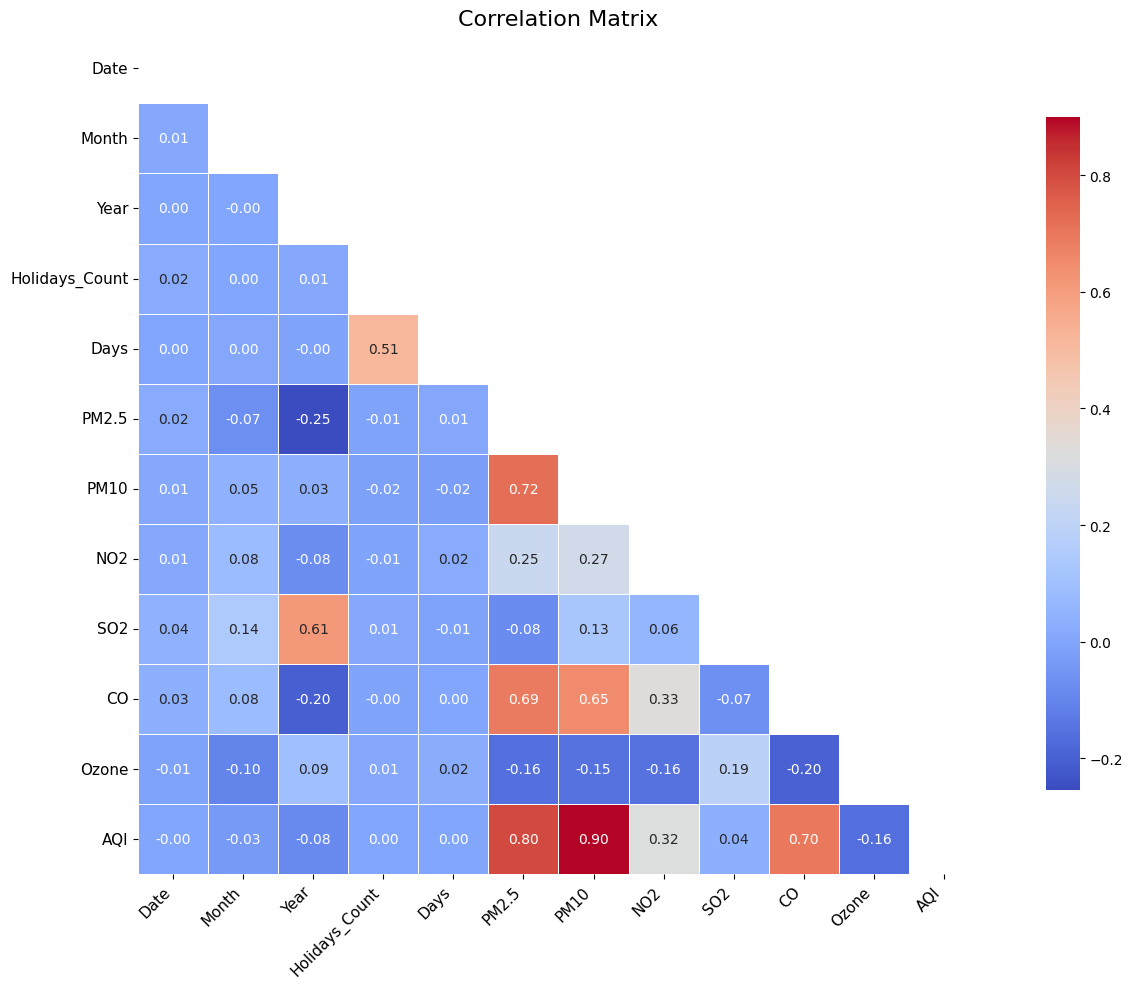

In [138]:
# computing the correlation matrix
corr = df.select_dtypes(include=['number']).corr()

# only lower half (to get rid of unimportant data)
mask = np.triu(np.ones_like(corr, dtype=bool))

# create map
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

# formatting
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()